In [108]:
import warnings
warnings.filterwarnings('ignore')

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
bank_data = pd.read_csv('bank-full.csv', delimiter = ";")

data = bank_data.copy()

#### **Data Info**

In [111]:
data.shape

(45211, 17)

In [112]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [113]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'], dtype=object)

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [115]:
cat_features = data.select_dtypes(exclude='number').columns
num_features = data.select_dtypes('number').columns

In [116]:
cat_features

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [117]:
num_features

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [118]:
data[cat_features].head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [119]:
data[num_features].head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [120]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [121]:
data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [122]:
data.isnull().sum()  # isna() or isnull()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [123]:
data.isin(['?']).sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### **Distribution of Different Features**

##### Age

In [124]:
data['age'].value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

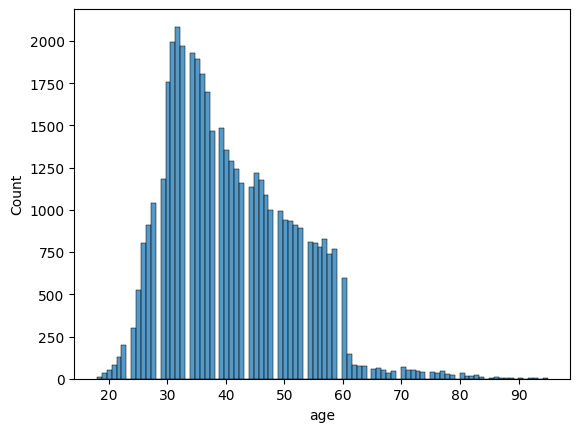

In [125]:
sns.histplot(data['age']);

<Axes: >

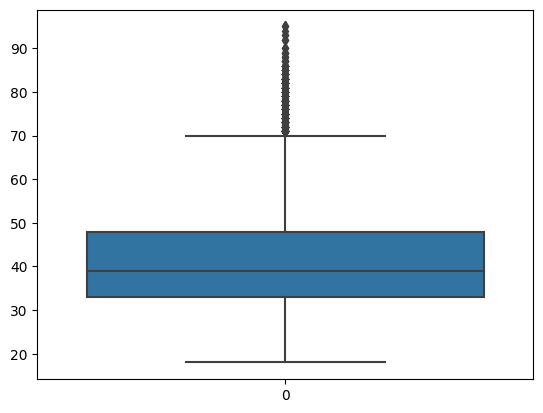

In [126]:
sns.boxplot(data['age'])

In [127]:
firstQ = data['age'].quantile(q = 0.25)
thirdQ = data['age'].quantile(q = 0.75)

IQR = thirdQ - firstQ

In [128]:
print(IQR)

15.0


In [129]:
outliers_age = thirdQ + 1.5*IQR

In [130]:
data.age[data['age']>outliers_age].count()

487

In [131]:
# Binning to Handle Outliers

data.loc[data['age']<=firstQ, 'age'] = 1

data.loc[(data['age']>firstQ) & (data['age']<=thirdQ), 'age'] = 2

data.loc[data['age']>thirdQ, 'age'] = 3

In [132]:
data['age'].unique()

array([3, 2, 1])

In [133]:
data['age'].value_counts()

2    20940
1    13083
3    11188
Name: age, dtype: int64

In [134]:
pd.crosstab(data['age'], data['y'])

y,no,yes
age,,
1,11301,1782
2,18919,2021
3,9702,1486


##### Duration

In [135]:
data['duration'].value_counts()

124     188
90      184
89      177
104     175
122     175
       ... 
1833      1
1545      1
1352      1
1342      1
1556      1
Name: duration, Length: 1573, dtype: int64

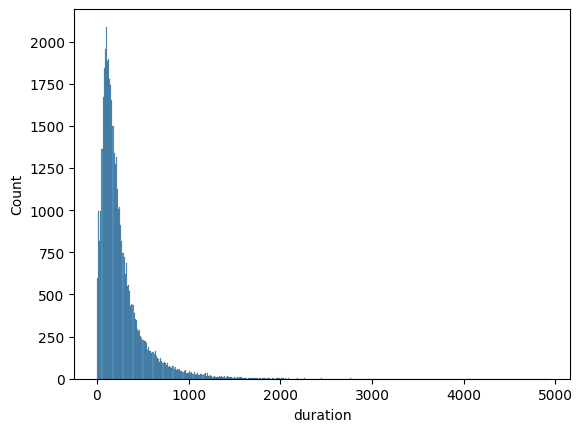

In [136]:
sns.histplot(data['duration']);

In [137]:
firstQd = data['duration'].quantile(q = 0.25)
thirdQd = data['duration'].quantile(q = 0.75)

# Binning to Handle Outliers

data.loc[data['duration']<=firstQd, 'duration'] = 1

data.loc[(data['duration']>firstQd) & (data['duration']<=thirdQd), 'duration'] = 2

data.loc[data['duration']>thirdQd, 'duration'] = 3

In [138]:
data['duration'].unique()

array([2, 1, 3])

##### Pdays

In [139]:
data['pdays'].value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64

In [140]:
data.loc[data['pdays'] != -1, 'pdays'] = 1

In [141]:
data.pdays.value_counts()

-1    36954
 1     8257
Name: pdays, dtype: int64

In [142]:
data['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [143]:
data.poutcome[data['poutcome'] == 'unknown'] = -1
data.poutcome[data['poutcome'] == 'failure'] = 0
data.poutcome[data['poutcome'] == 'success'] = 1
data.poutcome[data['poutcome'] == 'other'] = -1

In [144]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,3,management,married,tertiary,no,2143,yes,no,unknown,5,may,2,1,-1,0,-1,no
1,2,technician,single,secondary,no,29,yes,no,unknown,5,may,2,1,-1,0,-1,no
2,1,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,1,-1,0,-1,no
3,2,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,1,-1,0,-1,no
4,1,unknown,single,unknown,no,1,no,no,unknown,5,may,2,1,-1,0,-1,no


In [145]:
encode = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']
scale = ['balance', 'campaign']

In [146]:
X = data.drop('y', axis = 1)
y = data.y

In [147]:
X.shape, y.shape

((45211, 16), (45211,))

#### **Scaling and Encoding**

In [148]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [149]:
y = LabelEncoder().fit_transform(y)

In [150]:
preprocess = ColumnTransformer([
    ('cat', OrdinalEncoder(), encode),
    ('num', StandardScaler(), scale)
], remainder = 'passthrough')

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [154]:
train = preprocess.fit_transform(X_train)

In [155]:
test = preprocess.transform(X_test)

#### **Balancing Dataset**

In [176]:
from imblearn.over_sampling import SMOTE

In [177]:
smote = SMOTE()
x_b, y_b = smote.fit_resample(train, y_train)

#### **Model**

In [156]:
from sklearn.linear_model import LogisticRegression

In [178]:
LR = LogisticRegression()
LR.fit(x_b, y_b)

LogisticRegression()

In [192]:
LR.score(train, y_train)

0.7824872815748728

In [180]:
LR.score(test, y_test)

0.777839212650669

In [181]:
y_pred_train = LR.predict(train)
y_pred_test = LR.predict(test)

#### **Metrics**

In [172]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

In [182]:
print(recall_score(y_test, y_pred_test))
print(recall_score(y_train, y_pred_train))

0.7844990548204159
0.7667218151737178


In [183]:
print(f1_score(y_test, y_pred_test))
print(f1_score(y_train, y_pred_train))

0.4524393567729627
0.45196795541623125


In [184]:
print(precision_score(y_test, y_pred_test))
print(precision_score(y_train, y_pred_train))

0.3178858674837227
0.32042670881074675


In [186]:
from sklearn.model_selection import GridSearchCV

In [187]:
param = [
    {
        'max_iter' : [500,1000,2000,3000],
        'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
        'penalty' : ['l1', 'l2', 'elasticnet']
    }
]

In [188]:
gs = GridSearchCV(LR, param_grid = param, cv = 3, scoring = 'f1', n_jobs = -1)

In [189]:
gs.fit(x_b, y_b)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'max_iter': [500, 1000, 2000, 3000],
                          'penalty': ['l1', 'l2', 'elasticnet'],
                          'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag',
                                     'saga']}],
             scoring='f1')

In [190]:
gs.best_score_

0.7991192976573979

In [191]:
gs.best_params_

{'max_iter': 500, 'penalty': 'l2', 'solver': 'sag'}